# Membuat Rabi Model (Fig. 4.4) dengan Qutip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Dengan Hamiltonian beriku untuk Rabi model
$$
\hat{H} = \frac{1}{2}\hbar\omega_0\sigma_z+\hat{\mathcal{V}}\cos\left(\omega t\right)\sigma_x
$$

Mengingat untuk RWA dimana $\omega_{0} - \omega$ saja yang dipakai.

In [26]:
# list parameter atau variabel yang dibutuhkan
hbar    = 1
w0      = 13
V       = 0.05 * w0
tlist   = np.arange(0, 25, 0.01)
g       = basis(2,0)
e       = basis(2,1)
psi0    = g

In [27]:
# mendifinisikan hamiltonian dan fungsi gelombang
def H_rabi(t, detuning, RWA=False):
    if RWA:  
        return [[V/2*sigmax(), np.cos(detuning * t)], [V/2*sigmay(), np.sin(detuning*t)]]
    return [hbar * w0 * sigmaz() / 2, [V * sigmax(), np.cos((w0 - detuning) * t)]]

def prob(of_what_state, if_given_state):
    return np.array(
        [np.abs(of_what_state.overlap(if_given_state[i])) ** 2
         for i in range(len(tlist))]
        )

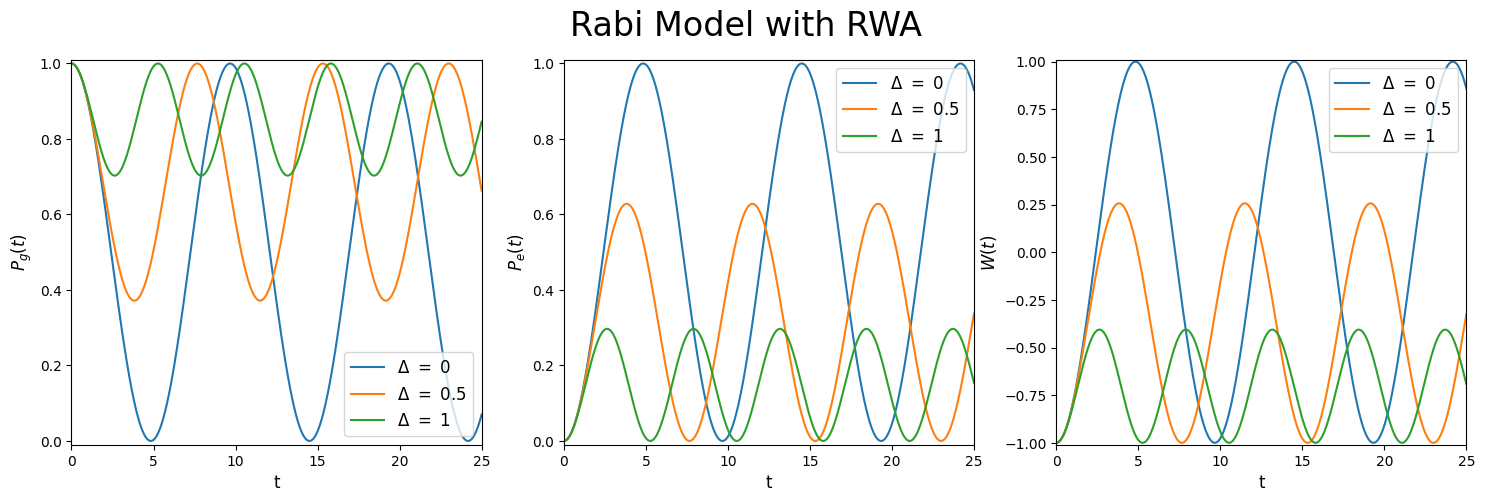

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

rwa = True
for detuning in [0, 0.5, 1]:    
        H = H_rabi(tlist, detuning = detuning, RWA = rwa)

        psi_t = sesolve(H, psi0, tlist).states

        if rwa: 
            for j in range(len(tlist)):
                U = (1j * w0 / 2 * sigmaz() * tlist[j]).expm()
                psi_t[j] = U.dag() * psi_t[j]

        g_t = prob(g, psi_t)

        e_t = prob(e, psi_t)
        
        w = e_t - g_t
               
        ax[0].plot(tlist, g_t, label = r"$\Delta\ =\ %s$" %detuning)
        ax[1].plot(tlist, e_t, label = r"$\Delta\ =\ %s$" %detuning)
        ax[2].plot(tlist, w, label = r"$\Delta\ =\ %s$" %detuning)

# set parameter axis
ax[0].set_ylim(-0.01,1.01)
ax[1].set_ylim(-0.01,1.01)
ax[2].set_ylim(-1.01,1.01)
ax[0].set_xlim(0,25)
ax[1].set_xlim(0,25)
ax[2].set_xlim(0,25)
ax[0].legend(loc = "best", fontsize = 12)
ax[1].legend(loc = "best", fontsize = 12)
ax[2].legend(loc = "best", fontsize = 12)
ax[0].set_xlabel(r"t", fontsize = 12)
ax[1].set_xlabel(r"t", fontsize = 12)
ax[2].set_xlabel(r"t", fontsize = 12)
ax[0].set_ylabel(r"$P_g(t)$", fontsize = 12)
ax[1].set_ylabel(r"$P_e(t)$", fontsize = 12)
ax[2].set_ylabel(r"$W(t)$", fontsize = 12)

fig.suptitle('Rabi Model with RWA', fontsize = 24)
fig.savefig("Rabi_Model_Qutip_Coba.png", dpi = 600)
plt.show()